![dphi banner](https://dphi-courses.s3.ap-south-1.amazonaws.com/Datathons/dphi_banner.png)

# **Code For [Data Sprint #6](https://dphi.tech/challenges/datathon/) on <font color='green'>DPhi</font>**

#### **Author: [Harsh](https://www.linkedin.com/in/hpnightowl/)**

## Download the images
We are given google drive link in the '[Data](https://dphi.tech/practice/challenge/37#data)' section of problem page which has all the required train images (to build the model) and test images to predict the label of these images and submit the predictions on the [DPhi platform](https://dphi.tech/practice/challenge/37#submission).

We can use **GoogleDriveDownloader** form **google_drive_downloader** library in Python to download the shared files from the shared Google drive link: https://drive.google.com/file/d/1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo/view?usp=sharing

The file id in the above link is: **1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo**

In [1]:
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1_W2gFFZmy6ZyC8TPlxB49eDFswdBsQqo',
                                    dest_path='content/face_mask_detection.zip',
                                    unzip=True)

Unzipping...Done.


We have all the files from the shared Google drive link downloaded in the colab environment.

## Loading Libraries
All Python capabilities are not loaded to our working environment by default (even they are already installed in your system). So, we import each and every library that we want to use.

We chose alias names for our libraries for the sake of our convenience (numpy --> np and pandas --> pd, tensorlow --> tf).

Note: You can import all the libraries that you think will be required or can import it as you go along.

In [2]:
import pandas as pd                                     # Data analysis and manipultion tool
import numpy as np                                      # Fundamental package for linear algebra and multidimensional arrays
import tensorflow as tf                                 # Deep Learning Tool
import os                                               # OS module in Python provides a way of using operating system dependent functionality
import cv2                                              # Library for image processing
from sklearn.model_selection import train_test_split    # For splitting the data into train and validation set

## Loading and preparing training data
The train and test images are given in two different folders - 'train' and 'test'. The labels of train images are given in a csv file 'Training_set_face_mask.csv' with respective image id (i.e. image file name).

#### Getting the labels of the images

In [3]:
labels = pd.read_csv("/content/content/face_mask_detection/Training_set_face_mask.csv")   # loading the labels
labels.head()           # will display the first five rows in labels dataframe

,filename,label
0,Image_1.jpg,without_mask
1,Image_2.jpg,without_mask
2,Image_3.jpg,without_mask
3,Image_4.jpg,without_mask
4,Image_5.jpg,without_mask


In [4]:
labels.tail()            # will display the last five rows in labels dataframe

,filename,label
11259,Image_11260.jpg,with_mask
11260,Image_11261.jpg,with_mask
11261,Image_11262.jpg,with_mask
11262,Image_11263.jpg,with_mask
11263,Image_11264.jpg,with_mask


#### Getting images file path

In [5]:
file_paths = [[fname, '/content/content/face_mask_detection/train/' + fname] for fname in labels['filename']]

#### Confirming if no. of labels is equal to no. of images

In [6]:
# Confirm if number of images is same as number of labels given
if len(labels) == len(file_paths):
    print('Number of labels i.e. ', len(labels), 'matches the number of filenames i.e. ', len(file_paths))
else:
    print('Number of labels does not match the number of filenames')

Number of labels i.e.  11264 matches the number of filenames i.e.  11264


#### Converting the file_paths to dataframe

In [7]:
images = pd.DataFrame(file_paths, columns=['filename', 'filepaths'])
images.head()

,filename,filepaths
0,Image_1.jpg,/content/content/face_mask_detection/train/Ima...
1,Image_2.jpg,/content/content/face_mask_detection/train/Ima...
2,Image_3.jpg,/content/content/face_mask_detection/train/Ima...
3,Image_4.jpg,/content/content/face_mask_detection/train/Ima...
4,Image_5.jpg,/content/content/face_mask_detection/train/Ima...


#### Combining the labels with the images

In [8]:
train_data = pd.merge(images, labels, how = 'inner', on = 'filename')
train_data.head()       

,filename,filepaths,label
0,Image_1.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
1,Image_2.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
2,Image_3.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
3,Image_4.jpg,/content/content/face_mask_detection/train/Ima...,without_mask
4,Image_5.jpg,/content/content/face_mask_detection/train/Ima...,without_mask


The 'train_data' dataframe contains all the image id, their locations and their respective labels. Now the training data is ready.

## Data Pre-processing
It is necessary to bring all the images in the same shape and size, also convert them to their pixel values because all machine learning or deep learning models accepts only the numerical data. Also we need to convert all the labels from categorical to numerical values.

In [9]:
# Import Statements
!pip install opencv-python

import cv2
import random
import matplotlib.pyplot as plt

In [10]:
img = list(train_data.filepaths)
label = list(train_data.label)

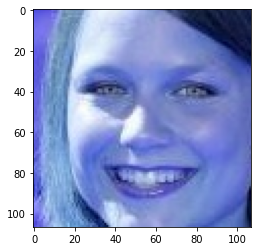

In [11]:
plt.figure()
pic = cv2.imread(img[0])
plt.imshow(pic)
plt.show()